# Исследование надёжности заёмщиков

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Ответьте-на-вопросы" data-toc-modified-id="Шаг-3.-Ответьте-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответьте на вопросы</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li></ul></div>

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

**Цель исследования** — проверить три гипотезы и ответить на вопрос:
1. Зависимость между наличием детей и возвратом кредита в срок;
2. Зависимость между семейным положением и возвратом кредита в срок;
3. Зависимость между уровнем дохода и возвратом кредита в срок;
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

**Шаг 1 - Получение входных данных от банка и изучение общей информации** — статистика о платёжеспособности клиентов. 
<br> Путь к файлу: */datasets/data.csv*. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

**Шаг 2 - Предобработка данных:**
1. определение и заполнение пропущенных значений;
2. замена вещественного типа данных на целочисленный;
3. удаление дубликатов;
4. выделение леммы в значениях столбца с целями получения кредита;
5. категоризация данных.

**Шаг 3 - Проверка гипотез**

**Шаг 4 - Подведение итогов исследования**

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем библиотеку Pandas, открываем файл 'data.csv' из папки '/datasets', сохраняем в переменную df:

In [1]:
import pandas as pd # импорт библиотеки pandas
import pymystem3 # импорт библиотеки pymystem3
import seaborn as sns # импорт библиотеки seaborn

df = pd.read_csv('/datasets/data.csv')
df.to_csv('data.csv')
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Получаем общую информацию о таблице:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**Описание данных таблицы:**

Таблица состоит из 21525 строк, 12 столбцов. 

Тип данных в столбцах:
* float64 (2 столбца) - вещественные числа (с плавающей точкой), 
* int64 (5 столбцов) - целые числа, 
* object (5 столбцов) - строковые значения (текст)

Согласно документации к данным:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

В названиях колонок отсутствуют нарушения стиля:

1. Строчные буквы;
2. Пробелы отсутствуют;
3. Используется "змеиный" регистр.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

В некоторых столбцах, например, `education`, содержатся строчные и прописные буквы. Необходимо провести дополнительную обработку данных для приведения к единому стилю.

На первый взгляд тип данных каждого столбца правильно отражает содержащиеся в них данные, то есть, например, столбцы с числами имеют тип `float64` или `int64`, а не `object`, и наоборот.

**Вывод**

В каждой строке таблицы содержится информация о клиентах банка. Часть данных рассказывает о возрасте, семейном положении, уровне образования, занятости клиента. Другая - о финансой составляющей: ежемесячном доходе, имеющейся задолженности и цели получения кредита.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а некоторые данные не имеют единого формата, например, в столбце `education`. Также данные необходимо проверить на явные и неявные дубликаты.

Чтобы двигаться дальше, нужно устранить описанные выше проблемы.

## Шаг 2. Предобработка данных

### Обработка пропусков

Сначала посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [4]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Не все пропущенные значения влияют на исследование. Так в `days_employed` пропуски не важны для нашей работы. Но пропуски в `total_income` могут помешать проверке гипотезы о зависимости возврата кредит в срок от уровня дохода клиента. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. В связи с этим необходимо:
* изучить пропуски, попытаться выявить закономерность и выяснить причину появления пропусков;
* рассчитать долю пропусков к общему объёму выборки, оценить их возможное влияние на результаты исследования;
* обработать пропуски или удалить строки с пропущенными значениями.

Отфильтруем 5 первых строк выборки с пустыми значениями в столбце `total_income`:

In [5]:
display(df[df['total_income'].isna()].head())
a = df['total_income'].isna().mean() # посчитали долю пропусков к общему объему выборки по столбцу 'total_income'
display(f'Доля пропусков к общему объему выборки составила: {a:0.1%}')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


'Доля пропусков к общему объему выборки составила: 10.1%'

* По данным таблицы непонятно, являются ли пропуски случайными или сделаны намеренно, т.к. данные указанных клиентов очень сильно разнятся как по социальному статусу, возрасту и образованию, так и по целям кредитов;
* Доля пропусков к общему объёму выборки составляет 10,1% - высокий показатель, который может существенно повлиять на результаты исследования;
* Вследствие того, что достоверно установить причину пропусков и восстановить данные нет возможности, а доля пропусков существенная (10,1%), предлагается удалить строки с пропущенными значениями.

Удалим строки с пропущенными значениями. Убедимся, что в таблице не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения:

Отфильтруем пропущенные значения в столбце `total_income` и рассчитаем долю пропусков по каждой группе в столбце `income_type` с помощью функции `value_counts(normalize=True)`. Аругемент `normalize=True` рассчитывает долю пропусков в каждой группе в %:

In [6]:
# Код ревьюера

df.groupby('income_type')['total_income'].apply(lambda x : x.isna().mean())

income_type
безработный        0.000000
в декрете          0.000000
госслужащий        0.100754
компаньон          0.099902
пенсионер          0.107106
предприниматель    0.500000
сотрудник          0.099379
студент            0.000000
Name: total_income, dtype: float64

In [7]:
income_type_grouped = df[df['total_income'].isna()]['income_type'].value_counts(normalize=True)
print(income_type_grouped)

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64


In [8]:
# выполним ту же самую операцию для пропусков в столбце "days_employed":
days_employed_grouped = df[df['days_employed'].isna()]['income_type'].value_counts(normalize=True)
print(days_employed_grouped)

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64


Из таблиц видно, что доли пропусков в столбцах `total_income` и `days_employed` при группировке по типу занятости полностью совпадают. Следовательно, пропуски не являются случайными.  

Заполним пропуски медианными значениями по группам  с помощью метода .transform()::

In [9]:
# для столбца 'total_income'
df['total_income'] = df.groupby('income_type')['total_income'].transform(lambda x: x.fillna(x.median()))

# для столбца 'days_employed'
df['days_employed'] = df.groupby('income_type')['days_employed'].transform(lambda x: x.fillna(x.median()))

# убедимся, что пропуски заполнены
print(df['total_income'].isna().sum())
print(df['days_employed'].isna().sum())

0
0


**Вывод**

* В данных кредитного отдела банка имелись пропуски;
* Установить истинную причину возникновения пропусков и восстановить пропущенные значения не представляется возможным;
* Вледствие того, что доля пропусков существенная (10,1%), было предложено заменить их на медианное значение по группе.

### Замена типа данных

Произведём замену вещественного типа данных на целочисленный в столбцах `days_employed`, `total_income` методом `.astype()`.
Данный метод используется для приведения объекта pandas к указанному dtype. astype() также предоставляет возможность конвертировать любой подходящий существующий столбец в категориальный тип.

Убедимся, что тип данных в столбцах изменился на `int`.

In [10]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')
df.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object

**Вывод**

Тип данных в столбцах `days_employed`, `total_income` преобразован из вещественного на целочисленный.

### Обработка дубликатов

Посчитаем явные дубликаты в таблице одной командой:

In [11]:
print(df.duplicated().sum())

54


Явные дубликаты в таблице отсутствуют. Проверим данные таблицы на наличие неявных дубликатов. Для этого применим метод `.value_counts()`, который возвращает уникальные значения столбца и их количество, к столбцам с текстовым типом данных, а именно: `education`, `family_status`, `family_status_id`, `gender`, `income_type`, `purpose`, `children`.

In [12]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [13]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [14]:
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [15]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [16]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [17]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [18]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**Выявлены следующие неявные дубликаты и неточности в данных:**
1. В столбце `education` данные имеют разный регистр;
2. В столбце `family_status` данные имеют разный регистр
3. В столбце `gender` данные имеют 3 вида значений: `F`, `M`, `XNA`. Если с первыми двумя значениями все предельно ясно, то `XNA` - пропуск - скорее всего он возник из-за ввода несуществующего значения, отличного от `F`, `M`. Данное значение не окажет существенного влияния на результаты исследования;
4. В столбце `income_type` проблемы с данными отсутствуют;
5. В столбце `purpose` имеется множество различных целей по кредитам. Требуется более глубокий анализ;
6. В столбцу `children` имеется отрицательное значение. Таких позиций 34. Возможно, это семьи/люди, у которых приемные дети.

Основная причина появления дубликатов - ручная форма ввода без предварительной проверки со стороны системы. То же касается возникновения пропусков в данных из-за ввода несуществующих данных.

**Предлагается решить указанные вопросы следующим образом:**

**1.** В столбце `education` приведем все значения к нижнему регистру:

In [19]:
df['education'] = df['education'].str.lower()

Убедимся, что в столбце `education` убрали дубликаты:

In [20]:
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

**2.** В столбце `family_status` приведем все к нижнему регистру:

In [21]:
df['family_status'] = df['family_status'].str.lower() # привели все значения в столбце к нижнему регистру

# Убедимся, что в столбце 'family_status' убрали дубликаты:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

**Вывод**

1. Исправлены недостатки данных в столбцах `education` и `family_status`. Значения последнего критически важно, т.к. напрямую влияют на проверку одной из гипотез;
2. В столбце `purpose` имеется множество различных целей по кредитам. Требуется более глубокий анализ: предварительно с помощью лемматизации;
3. Остальные данные имеют корректный формат либо незначительные недостатки, которые не окажут существенного влияния на результаты исследования.

### Лемматизация

В столбце `purpose` имеется множество различных целей по кредитам. Изучив данные п. 2.3 "Обработка дубликатов" (столбец `purpose`) выделим основные цели, для которых берут кредит.
С этой целью для всех слов в столбце `purpose` проведем лемматизацию, то есть приведение слова к его словарной форме и добавим в единый список:

In [23]:
# импортируем конструктор Mystem() из библиотеки  pymystem3 
from pymystem3 import Mystem

m = Mystem()

# выделяем уникальные записи целей кредита
purpose_unique = pd.Series(df['purpose'].unique())

# с помощью apply применим конструктор Mystem() для каждой ячейки Series, 
# а метода .explode() - разнесем значения списков по отдельным строкам Series

print(purpose_unique.apply(m.lemmatize).explode().unique())

['покупка' ' ' 'жилье' '\n' 'приобретение' 'автомобиль' 'дополнительный'
 'образование' 'сыграть' 'свадьба' 'операция' 'с' 'на' 'проведение' 'для'
 'семья' 'недвижимость' 'коммерческий' 'жилой' 'строительство'
 'собственный' 'подержать' 'свой' 'со' 'заниматься' 'сделка' 'подержанный'
 'получение' 'высокий' 'профильный' 'сдача' 'ремонт']


**Из полученных данных видно, что основными целями получения кредита являются:**
* операции (покупка, строительство, ремонт) с жилой и коммерческой недвижимостью;
* покупка и ремонт автомобиля;
* получение разного рода образования;
* свадьба;

При этом необходимо отметить, что ключевое слово "операция" здесь не имеет отношения к врачебной или иной медицинской деятельности, а связано исключительно с недвижимостью.

С помощью функции добавим в новый столбец `purpose_new` унифицированные значения целей кредита:

In [24]:
def purpose_change(purpose):
    lemma = m.lemmatize(purpose)
    if 'автомобиль' in lemma:
        return 'автомобиль'
    elif 'недвижимость' in lemma:
        return 'недвижимость'
    elif 'жилье' in lemma:
        return 'недвижимость' 
    elif 'образование' in lemma:
        return 'образование'
    elif 'свадьба' in lemma:
        return 'свадьба'
    elif 'автомобиль' in lemma:
        return 'автомобиль'

# создадим новый столбец df['purpose_new']
df['purpose_new'] = df['purpose'].apply(purpose_change)

In [25]:
# проверим, все ли подтянулось правильно
df['purpose_new'].unique()

array(['недвижимость', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

**Вывод**

1. С помощью библиотеки `pymystem3` и встроенного в неё конструктора мы смогли обработать и получить леммы всех слов столбца `purpose`;
2. Были получены ключевые слова и выделены основные цели получения кредита.

### Категоризация данных

**Категоризация данных** - объединение/выделение данных по заданному критерию(-ям).
Категоризацию проводят с целью выделить необходимые данные и сконцентрироваться на их анализе.

Для того, чтобы провести категоризацию данных клиентов банка, ещё раз обратимся к целям исследования: выяснить, влияет ли семейное положение, количество детей и доход клиента на факт погашения кредита в срок, а также как на это влияют разные цели кредита? 
<br>Для ответа на эти вопросы выделим необходимые данные клиентов из датафрейма, а именно:
* данные о семейном положении;
* количестве детей;
* уровень дохода;
* цель кредита;
* информацию о наличии задолженности по возврату кредитов.

Для это применим индексацию в датафрейме:

In [26]:
df = df[['children','family_status','family_status_id','debt','total_income', 'purpose_new']]

display(df)

,children,family_status,family_status_id,debt,total_income,purpose_new
0,1,женат / замужем,0,0,253875,недвижимость
1,1,женат / замужем,0,0,112080,автомобиль
2,0,женат / замужем,0,0,145885,недвижимость
3,3,женат / замужем,0,0,267628,образование
4,0,гражданский брак,1,0,158616,свадьба
...,...,...,...,...,...,...
21520,1,гражданский брак,1,0,224791,недвижимость
21521,0,женат / замужем,0,0,155999,автомобиль
21522,1,гражданский брак,1,1,89672,недвижимость
21523,3,женат / замужем,0,1,244093,автомобиль


**Вывод**

Была проведена категоризация данных:
* выделены основные столбцы для проверки гипотез;
* данные по семейному статусу выведены в отдельный словарь для удобства работы с датафреймом.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [27]:
# сгруппируем датафрейм по столбцу "children" и рассчитаем долю должников с детьми по каждой категории
debt_children = df.groupby(by='children')['debt'].mean()
debt_children

children
-1     0.021277
 0     0.075129
 1     0.092154
 2     0.094404
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64

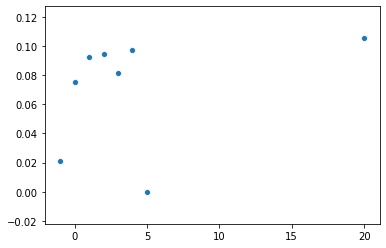

In [28]:
# Построим диаграмму рассеяния по данным таблицы:
sns.scatterplot(data=debt_children)

**Вывод**

По данным диаграммы видно, что наибольший объем просрочек кредитов среди клиентов, у которых 20 детей в семье - 10,5%. Наименьшая - у семей без детей либо приёмные (-1). Прослеживается прямая связь: чем больше детей в семье, тем выше объём просрочек по кредитам. Иными словами наблюдается прямая зависимость между наличием детей и возвратом кредита в срок.

Возможно, это связано с более высоким уровнем финансовой нагрузки заёмщиков с детьми. 

In [36]:
# Код ревьюера

df.groupby('children').agg(debt=('debt','mean')).style.format({'debt' : '{:.2%}'.format})

,debt
children,
-1,2.13%
0,7.51%
1,9.22%
2,9.44%
3,8.18%
4,9.76%
5,0.00%
20,10.53%


- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
# рассчитаем долю просрочки по займам исходя из семейного положения 
debt_family_status = df.groupby('family_status')['family_status','debt'].mean()  
debt_family_status.sort_values('debt')

,debt
family_status,
вдовец / вдова,0.065625
в разводе,0.071130
женат / замужем,0.075202
гражданский брак,0.092890
не женат / не замужем,0.097405


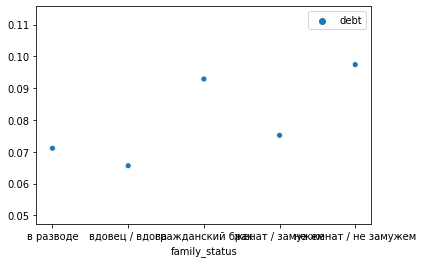

In [30]:
# Построим диаграмму рассеяния по данным таблицы:
sns.scatterplot(data=debt_family_status)

**Вывод**

* По данным диаграммы можно сделать вывод, что `наибольшая доля просрочки` по кредитам среди людей в семейном положении `"не женат / не замужем"` и `"гражданский брак"`. `Наименьшая` - `"вдовец / вдова"`; 
* Однако говорить о четкой взаимосвязи между семейным положением и возвратом кредита в срок нельзя: люди в "гражданском браке" допускают просрочку по кредитам так же часто, как и "не женат / не замужем". И наоборот, "женат / замужем" допускают просрочку по кредитам примерно так же, как и "вдовец / вдова", "в разводе".

Вторая гипотеза не подтверждена.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Разделим всех заёмщиков по уровню дохода на 5 групп. Для этого сортируем таблицу df по столбцу 'total_income':

In [31]:
# сортируем значения столбца 'total_income' по возрастанию
df = df.sort_values('total_income')
# разделим выборку на 5 карманов равной длинны добавим новый столбец 'section' в датафрейм; 
section_len = len(df['total_income'])/5
# добавим новый столбец 'section' в датафрейм; 
df['section'] = (df.index/section_len).astype(int)

Выведем долю просроченнных займов в разрезе групп доходов:

In [32]:
debt_total_income = df.groupby('section')['debt'].mean()
print(debt_total_income)

section
0    0.072938
1    0.075029
2    0.090360
3    0.079443
4    0.086643
Name: debt, dtype: float64


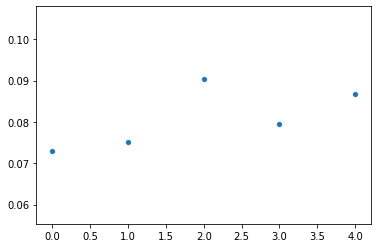

In [33]:
# Построим диаграмму рассеяния по данным таблицы:
sns.scatterplot(data=debt_total_income)

**Вывод**

* По данным диаграммы видно, что наибольшую долю просрочек (9%) имеют заемщики со средним уровнем дохода (2 "карман"), наименьшую - (7,3%) - с наиболее низкими доходами;
* Наиболее состоятельные заемщики (4 "карман") относительно часто допускают просрочки, доля которых - 8,7%;
* Высокий уровень просрочек состоятельных заемщиков (4 "карман"), возможно, связан с более высоким уровнем долговой нагрузки. Им, как и клиентам со средним уровнем дохода, банки наиболее часто и "охотно" выдают кредиты в отличие от замщиков с низкими доходами;
* По данным диаграммы можно сделать вывод, что существует определенная зависимость между уровнем дохода и возвратом кредита в срок, которая описывается кривой на диаграмме рассеивания.

- Как разные цели кредита влияют на его возврат в срок?

Для проверки гипотезы посчитаем долю просрочки по кредиту по каждой цели, указанной в заявке заемщика:

In [34]:
# добавим 'debt_status', приравняем к столбцу 'debt' и заменим просрочку - 1 на 'просрочка'
df['debt_status'] = df['debt']
df['debt_status'] = df[df['debt_status'] == 1] = 'просрочка'

# построим сводную таблицу по данным датафрейма и присвоим её переменной pivot_table
pivot_table = pd.pivot_table(df, columns='debt_status', values='debt', index='purpose_new',  aggfunc=['mean'])
pivot_table

,mean
debt_status,просрочка
purpose_new,
автомобиль,0.093395
недвижимость,0.072140
образование,0.091994
свадьба,0.079216


**Вывод**

* наибольшая доля просрочки среди категории "автомобиль" и "образование"   - 9.3% и 9.2% соответственно;
* наименьшая доля просрочки среди категории "недвижимость" и "свадьба" - 7.2% и 7.9% соответственно.

Можно сделать вывод, что наиболее дисциплинированными клиентами являются заемщики с целью кредита "Операции (покупка, строительство, ремонт) с жилой и коммерческой недвижимостью" и "свадьба". Операции с недвижимостью связаны, как правило, с длительным периодом кредитования и низким платежом (периодическим). На свадьбе люди, как правило, получает денежные подарки, за счёт которых возможно покрыть кредитные обязательства. Покупка/ремонт автомобиля и получение образования (в краткосрочной персопективе) такими преимуществами не обладают.

Таким образом можно сделать вывод о том, что цель кредита влияет на его возврат в срок.

## Шаг 4. Общий вывод

Было проведено исследование, проверены три гипотезы:

**1. Есть ли зависимость между наличием детей и возвратом кредита в срок?**

Прослеживается прямая связь: чем больше детей в семье, тем выше объём просрочек по кредитам. Иными словами наблюдается прямая зависимость между наличием детей и возвратом кредита в срок. Возможно, это связано с более высоким уровнем финансовой нагрузки заёмщиков с детьми.

Первая гипотеза подтверждена полностью.

**2. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Четкой взаимосвязи между семейным положением и возвратом кредита нет: люди в "гражданском браке" допускают просрочку по кредитам так же часто, как и "не женат / не замужем". И наоборот - "женат / замужем" допускают просрочку по кредитам примерно так же, как и "вдовец / вдова", "в разводе".

Вторая гипотеза не подтверждена.

**3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Существует определенная зависимость между уровнем дохода и возвратом кредита в срок:
* Высокий уровень просрочек состоятельных заемщиков (8,7%), возможно, связан с более высоким уровнем долговой нагрузки. Им, как и клиентам со средним уровнем дохода (доля просроченных кредитов - 9%), банки наиболее часто и "охотно" выдают кредиты в отличие от замщиков с низкими доходами.

Третья гипотеза подтверждена.

**Вопрос: "Как разные цели кредита влияют на его возврат в срок?"**

Наиболее дисциплинированными клиентами являются заемщики, совершающие "Операции (покупка, строительство, ремонт) с жилой и коммерческой недвижимости" и целью которых является свадьба. В первом случае, это вызвано, как правило, длительным периодом кредитования и низким платежом (периодическим). На свадьбе люди, как правило, молодожены получают денежные подарки, за счёт которых возможно покрыть кредитные обязательства в короткие сроки. Покупка/ремонт автомобиля и получение образования (на коротком промежутке времени) такими преимуществами не обладают.

Таким образом можно сделать вывод о том, что цель кредита влияет на его возврат в срок.
